Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load Dataset from Local Directory

In [2]:
from google.colab import files
uploaded = files.upload()

Saving SOCR-HeightWeight.csv to SOCR-HeightWeight.csv


Load Dataset

In [3]:
dataset = pd.read_csv('SOCR-HeightWeight.csv')

Summarize Dataset

In [4]:
print(dataset.shape)
print(dataset.head(5))

(25000, 3)
   Index  Height(Inches)  Weight(Pounds)
0      1        65.78331        112.9925
1      2        71.51521        136.4873
2      3        69.39874        153.0269
3      4        68.21660        142.3354
4      5        67.78781        144.2971


Segregate Dataset into X & Y

In [5]:
X = dataset.iloc[:, 1:-1].values
X

array([[65.78331],
       [71.51521],
       [69.39874],
       ...,
       [64.69855],
       [67.52918],
       [68.87761]])

In [6]:
Y = dataset.iloc[:, -1].values
Y

array([112.9925, 136.4873, 153.0269, ..., 118.2655, 132.2682, 124.8742])

Splitting Dataset for Train & Test

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

Training Dataset using Decision Tree

In [9]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(X_train, y_train)

DecisionTreeRegressor()

Visualizing Graph

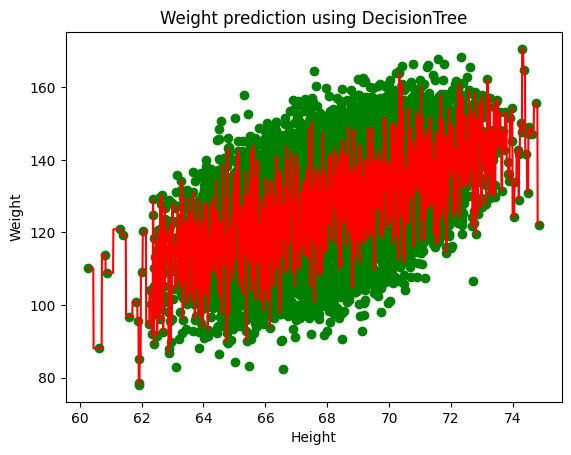

<Figure size 640x480 with 0 Axes>

In [10]:
X_val = np.arange(min(X_train), max(X_train), 0.01)
X_val = X_val.reshape((len(X_val), 1))
plt.scatter(X_train, y_train, color='green')
plt.plot(X_val, model.predict(X_val), color='red')
plt.title('Weight prediction using DecisionTree')
plt.xlabel('Height')
plt.ylabel('Weight')
plt.figure()
plt.show()

Predicting for all test data for validation

In [14]:
y_pred = model.predict(X_test)

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Root Mean Squared Error: ", rmse)
r2Score = r2_score(y_test, y_pred)
print("R2 Score: ", r2Score*100)

Root Mean Squared Error:  14.17672357535782
R2 Score:  -41.79449986983856
